In [18]:
# 1. Import Cleaned Data for Analysis
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import plotly.graph_objs as go
import pycountry
# 1.1 Load the cleaned data from CSV file
data_cleaned = pd.read_csv('data_cleaned.csv', index_col=[0, 1])

# Display the first few rows of the data to ensure it has loaded correctly
# data_cleaned.head(30)

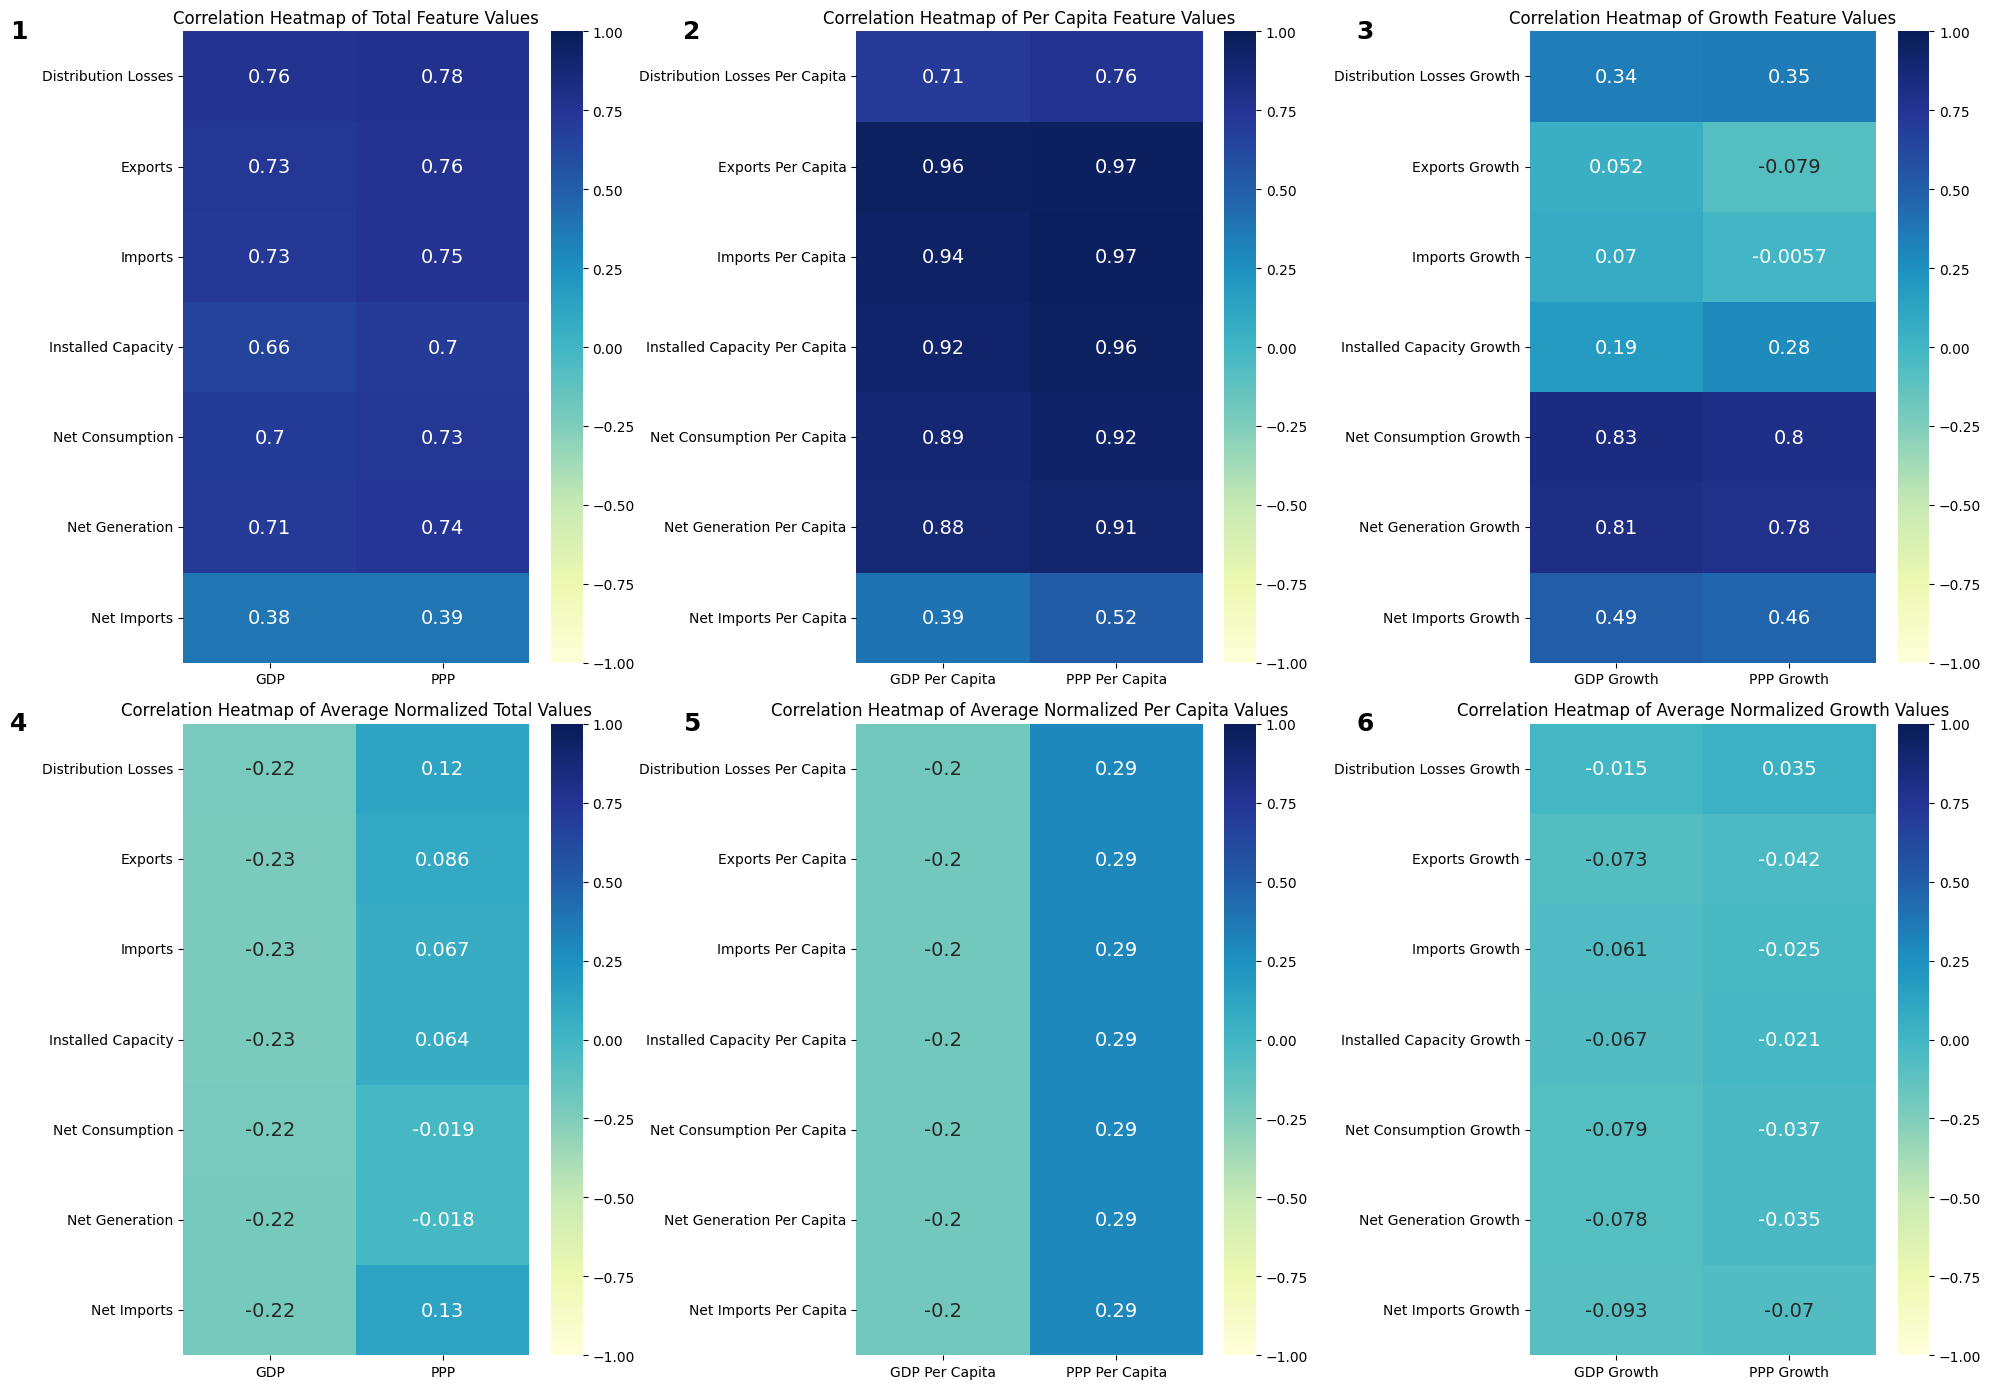

<Figure size 640x480 with 0 Axes>

In [19]:
# 2. Heatmap Analysis
# 2.1 Calculate the total values for each feature across all countries
# Sum the values for each feature independently
total_values = data_cleaned.groupby(level=1).sum()

# Calculate the correlation matrix for total values
correlation_total = total_values.T.corr()

# 2.2 Normalize data for each country to ensure equal weight for all countries
normalized_data = data_cleaned.groupby(level=0).transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate the average values for each feature across all countries after normalization
average_normalized_values = normalized_data.groupby(level=1).mean()

# Calculate the correlation matrix for average normalized values
correlation_average = average_normalized_values.T.corr()

# 2.3 Plot the heatmaps
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Extract different types of features
total_features = [col for col in data_cleaned.index.levels[1] if not ('Per Capita' in col or 'Growth' in col)]
per_capita_features = [col for col in data_cleaned.index.levels[1] if 'Per Capita' in col]
growth_features = [col for col in data_cleaned.index.levels[1] if 'Growth' in col]

# Calculate correlation matrices for total, per capita, and growth features
total_corr = data_cleaned.loc[(slice(None), total_features), :].groupby(level=1).sum().T.corr()
per_capita_corr = data_cleaned.loc[(slice(None), per_capita_features), :].groupby(level=1).sum().T.corr()

gdp_values = data_cleaned.xs('Economics: GDP', level=1)
weights = gdp_values.div(gdp_values.sum(axis=0), axis=1)
growth_weighted_sum = data_cleaned.loc[(slice(None), growth_features), :].mul(weights, level=0).groupby(level=1).sum()
growth_corr = growth_weighted_sum.T.corr()

# Calculate correlation matrices for normalized average values
total_avg_corr = normalized_data.loc[(slice(None), total_features), :].groupby(level=1).mean().T.corr()
per_capita_avg_corr = normalized_data.loc[(slice(None), per_capita_features), :].groupby(level=1).mean().T.corr()
growth_avg_corr = normalized_data.loc[(slice(None), growth_features), :].groupby(level=1).mean().T.corr()

# Custom label function to remove prefixes
def custom_label(label):
    return label.replace('Electricity: ', '').replace('Economics: ', '')

# Plot specific parts of heatmaps
x_subset1 = ['Economics: GDP', 'Economics: PPP']
y_subset1 = ['Electricity: Distribution Losses', 'Electricity: Exports', 'Electricity: Imports', 'Electricity: Installed Capacity', 'Electricity: Net Consumption', 'Electricity: Net Generation', 'Electricity: Net Imports']
sns.heatmap(total_corr.loc[y_subset1, x_subset1].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 0], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 0].set_title('Correlation Heatmap of Total Feature Values')
axes[0, 0].text(-0.5, 1.02, f'{1}', transform=axes[0, 0].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

x_subset2 = ['Economics: GDP Per Capita', 'Economics: PPP Per Capita']
y_subset2 = ['Electricity: Distribution Losses Per Capita', 'Electricity: Exports Per Capita', 'Electricity: Imports Per Capita', 'Electricity: Installed Capacity Per Capita', 'Electricity: Net Consumption Per Capita', 'Electricity: Net Generation Per Capita', 'Electricity: Net Imports Per Capita']
sns.heatmap(per_capita_corr.loc[y_subset2, x_subset2].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 1], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 1].set_title('Correlation Heatmap of Per Capita Feature Values')
axes[0, 1].text(-0.5, 1.02, f'{2}', transform=axes[0, 1].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

x_subset3 = ['Economics: GDP Growth', 'Economics: PPP Growth']
y_subset3 = ['Electricity: Distribution Losses Growth', 'Electricity: Exports Growth', 'Electricity: Imports Growth', 'Electricity: Installed Capacity Growth', 'Electricity: Net Consumption Growth', 'Electricity: Net Generation Growth', 'Electricity: Net Imports Growth']
sns.heatmap(growth_corr.loc[y_subset3, x_subset3].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 2], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 2].set_title('Correlation Heatmap of Growth Feature Values')
axes[0, 2].text(-0.5, 1.02, f'{3}', transform=axes[0, 2].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

sns.heatmap(total_avg_corr.loc[y_subset1, x_subset1].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 0], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 0].set_title('Correlation Heatmap of Average Normalized Total Values')
axes[1, 0].text(-0.5, 1.02, f'{4}', transform=axes[1, 0].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

sns.heatmap(per_capita_avg_corr.loc[y_subset2, x_subset2].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 1], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 1].set_title('Correlation Heatmap of Average Normalized Per Capita Values')
axes[1, 1].text(-0.5, 1.02, f'{5}', transform=axes[1, 1].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

sns.heatmap(growth_avg_corr.loc[y_subset3, x_subset3].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 2], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 2].set_title('Correlation Heatmap of Average Normalized Growth Values')
axes[1, 2].text(-0.5, 1.02, f'{6}', transform=axes[1, 2].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">Heatmap</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    Since my goal is to discuss the correlation between electricity data and economic data, I only retained the relevant parts of the heatmap. The first three figures show the correlation of total global values, while the latter three represent the mean of globally normalized data, preventing the dominance of major countries.
    
  <p style="color: #34495e; line-height: 1.6;">
    In subplot 1 and 2, we can clearly see the strong positive correlation between economic data and electricity data, indicating that our initial hypothesis is supported by the data.

  <p style="color: #34495e; line-height: 1.6;">
    Comparing subplot 1 and 4, as well as subplot 2 and 5, the correlation weakens after normalization, and GDP even turns into a negative correlation. This suggests that while major global economies show a positive correlation between economic data and electricity, many countries do not follow this pattern.

  <p style="color: #34495e; line-height: 1.6;">
    Observing subplot 3, only direct data related to electricity usage, such as net consumption and net generation, shows a strong correlation with economic growth. In contrast, indirect data or non-primary data such as imports and exports growth, distribution losses, and installed capacity show weaker correlations. These indirect factors are likely influenced by other variables, and different results may emerge over a longer time frame.

  <p style="color: #34495e; line-height: 1.6;">
    The subplot 6 shows a weak correlation, but this scenario will be reversed after imputation in Data Processing section.

  <p style="color: #34495e; line-height: 1.6;">
    Next, I will provide more details to discuss the correlation in subplots 3, 4, 5.
  </p>
  
</div>

In [20]:
# 3. Dividing the countries into 3 groups based on electricity import/export strategy
# 3.1 Calculate net import ratio
net_imports = data_cleaned.xs('Electricity: Net Imports', level=1)
net_generation = data_cleaned.xs('Electricity: Net Generation', level=1).replace(0, np.nan)  # Avoid division by zero
net_import_ratio = net_imports.div(net_generation)

# 3.2 Function to plot the net import ratio on the world map for each year
def plot_world_map(df, title):
    import plotly.graph_objects as go
    
    fig = go.Figure()

    years = df.columns  # Use the DataFrame columns as the years

    # Adjust years for GDP per Capita to exclude the 2021. It's NA
    if title == 'GDP per Capita with slider':
        years = years[:-1]  # Use the DataFrame columns as the years

    for year in years:
        # Filter the data for the current year
        filtered_df = df[year].dropna()  # Drop NaN values for the current year

        # Create a choropleth trace for the current year
        if title == 'Net Import Ratio Map with slider':
            colorscale = [
                [0.0, '#1B4F72'],
                [0.3, '#2E86C1'],
                [0.45, '#AED6F1'],
                [0.55, '#D7BDE2'],
                [0.7, '#884EA0'],
                [1.0, '#512E5F']
            ]
            colorbar = dict(
                tickvals=[-1.0, -0.05, 0.05, 1.0],
                ticktext=['-100%', '-5%', '5%', '100%'],
                len=0.8,
                lenmode='fraction'
            )
            hovertemplate = '<b>Country:</b> %{location}<br>' + '<b>Net Import Ratio:</b> %{z:.2%}<extra></extra>'
            zmin, zmax = -1.0, 1.0

        elif title == 'GDP per Capita with slider':
            colorscale = [
                [0.0, '#fee5d9'],
                [1136 / 80000, '#fcae91'],  # Place 1136 at approximately 1/3rd position
                [13845 / 80000, '#de2d26'],  # Place 13845 at approximately 2/3rd position
                [1.0, '#67000d']
            ]
            colorbar = dict(
                tickvals=[1136, 13845, 80000],
                ticktext=['1136', '13845', '80000'],
                len=0.8,
                lenmode='fraction'
            )
            hovertemplate = '<b>Country:</b> %{location}<br>' + '<b>GDP per Capita:</b> %{z:.2f}<extra></extra>'
            zmin, zmax = 0, 80000

        trace = go.Choropleth(
            locations=filtered_df.index,
            z=filtered_df.values,
            locationmode='country names',  # Correct locationmode value
            colorscale=colorscale,
            colorbar=colorbar,
            hovertemplate=hovertemplate,
            zmin=zmin,  # Set minimum value of color range
            zmax=zmax,  # Set maximum value of color range
            visible=False  # Set the trace to invisible initially
        )
        
        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i, year in enumerate(years):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{title} - {year}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(year)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=title,  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth',
            showcountries=True
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly'
    )

    # Show the figure
    fig.show()

plot_world_map(net_import_ratio, 'Net Import Ratio Map with slider')

plot_world_map(data_cleaned.xs('Economics: GDP Per Capita', level=1), 'GDP per Capita with slider')


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">Dynamic Map</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    To discuss the disparities observed in the heatmap more precisely, we need to categorize the countries. I’ve decided to classify countries based on their electricity import rate (i.e., net imports/net generation). While categorizing by GDP per capita is also possible, many countries have experienced significant economic fluctuations over the past 30 years. Therefore, I prefer a more stable classification criterion, with the latter used as a secondary criterion for further discussion. To demonstrate the stability of the former approach, I’ve created two dynamic world maps.

  <p style="color: #34495e; line-height: 1.6;">
    In the first map, countries are classified into three categories based on whether their net electricity import or export rate exceeds 5%: self-sufficient, net importer, or net exporter. Although 30 years is a long time span, most countries’ electricity import/export strategies remain stable, either as self-sufficient or as net exporters. Only a few countries frequently alternate between heavy imports and exports, and their economic characteristics will be discussed later.
    
  <p style="color: #34495e; line-height: 1.6;">
    The second map shows more unpredictable changes, and in the heatmap, it has low correlation with electricity data overall. The only noticeable trend is that countries with higher GDP per capita tend to maintain a relatively stable electricity import rate, with exceptions such as Finland, Sweden, and Norway. These three countries are intriguing: Finland has been a net electricity importer over long periods, though its import rate sometimes drops, and when it does, Sweden and Norway’s net import rates tend to rise correspondingly. And even transform from net importer to net exporter. I even think that if we treat the electricity data of these three countries as a whole, the power data for the Nordic region would appear more stable.

  <p style="color: #34495e; line-height: 1.6;">
    The reason I discuss the electricity export rates of these Nordic countries separately is that I believe this “neighborly complementarity” model is quite representative. Observing regions like Southern and Western Africa, we can see a similar pattern. Countries often rely on their neighbors for electricity, with supply and demand relationships sometimes reversing over time. Although this might seem volatile, a balance is maintained overall.
    
  </p>
  
</div>

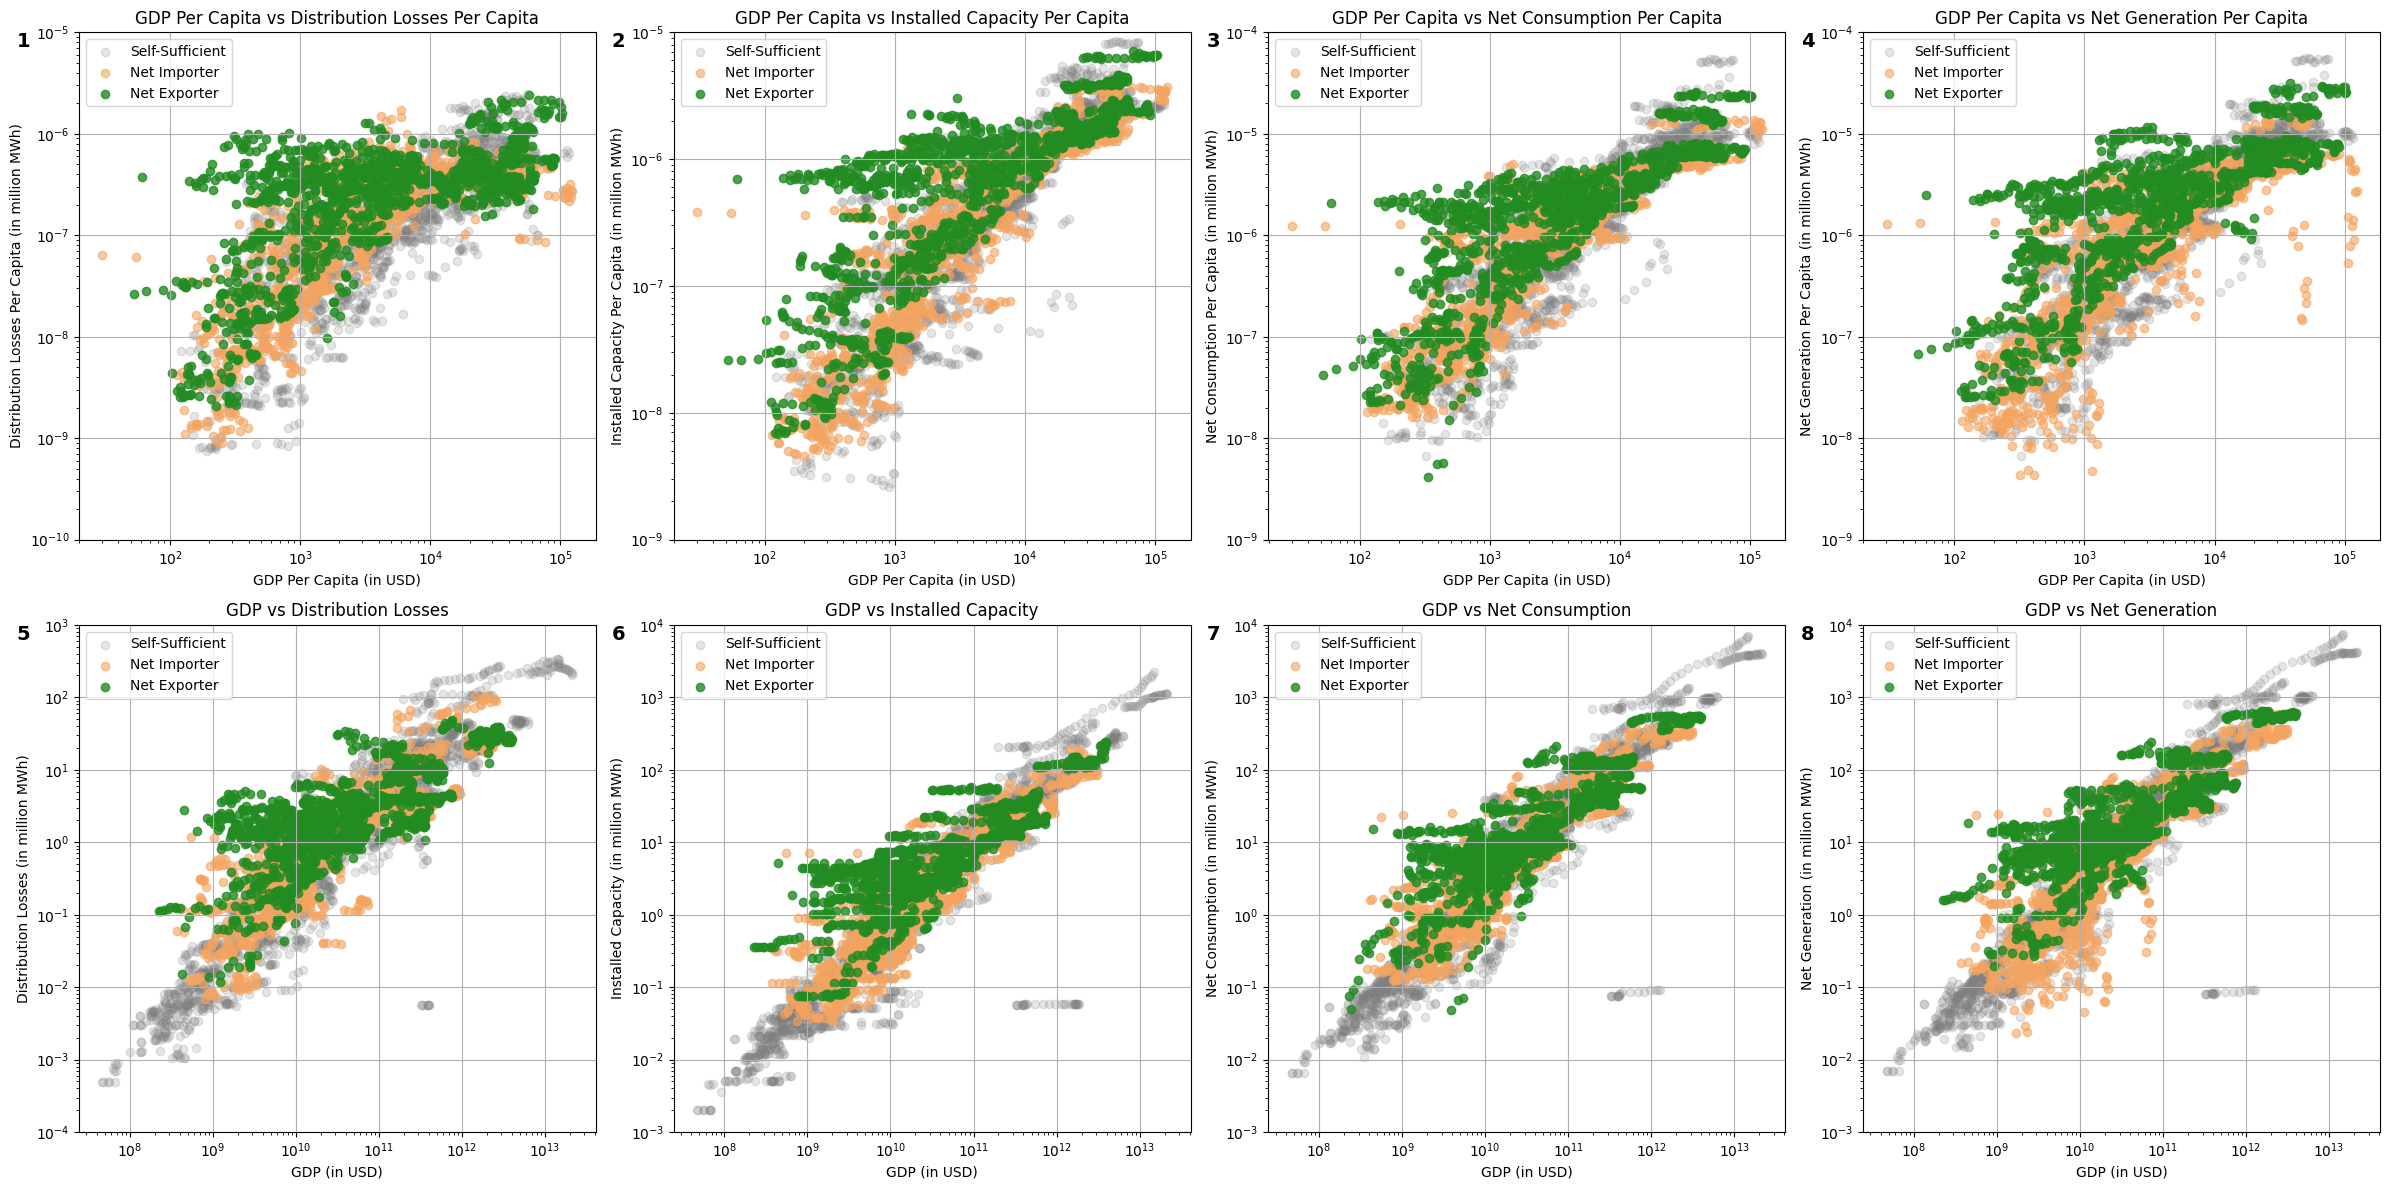

Net Importer Countries: 49
Net Exporter Countries: 46
Self-Sufficient Countries: 75
Switcher Countries: 0
Other Countries: 0


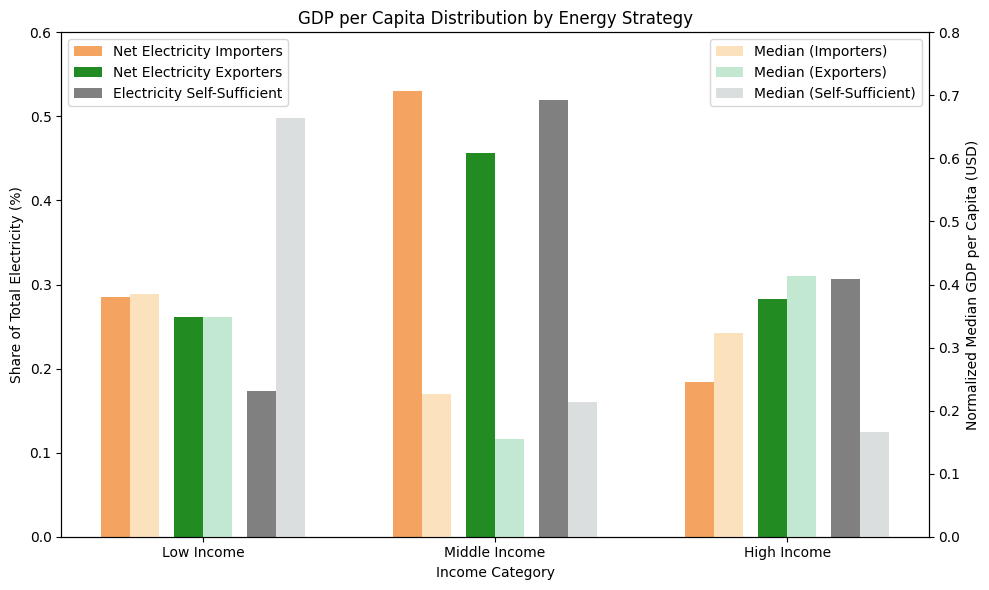

In [25]:
# 4. Scatter Plot Analysis
# 4.1 Classify energy status based on yearly net import ratio
net_import_ratio_threshold = 0.05
classification_threshold = 0.7

def classify_energy_status(country_data):
    years_as_exporter = (country_data < -net_import_ratio_threshold).sum()
    years_as_importer = (country_data > net_import_ratio_threshold).sum()
    years_as_self_sufficient = ((country_data >= -0.05) & (country_data <= 0.05)).sum()
    total_years = len(country_data)
    
    if total_years == 0:
        return 'Other'
    
    exporter_ratio = years_as_exporter / total_years
    importer_ratio = years_as_importer / total_years
    self_sufficient_ratio = years_as_self_sufficient / total_years
    switcher_ratio = (years_as_importer + years_as_exporter) / total_years
    
    if exporter_ratio > classification_threshold:
        return 'Net Energy Exporter'
    elif importer_ratio > classification_threshold:
        return 'Net Energy Importer'
    elif self_sufficient_ratio > classification_threshold:
        return 'Energy Self-Sufficient'
    elif switcher_ratio > classification_threshold:
        return 'Frequent Import-Export Switcher'
    else:
        return 'Other'

# Apply classification to each country
energy_status = net_import_ratio.groupby(level=0).apply(lambda group: classify_energy_status(group.values))

# Split data into groups based on classification
importer_countries = energy_status[energy_status == 'Net Energy Importer'].index
exporter_countries = energy_status[energy_status == 'Net Energy Exporter'].index
self_sufficient_countries = energy_status[energy_status == 'Energy Self-Sufficient'].index
switcher_countries = energy_status[energy_status == 'Frequent Import-Export Switcher'].index
other_countries = energy_status[energy_status == 'Other'].index

data_importers = data_cleaned.loc[importer_countries]
data_exporters = data_cleaned.loc[exporter_countries]
data_self_sufficient = data_cleaned.loc[self_sufficient_countries]
data_switchers = data_cleaned.loc[switcher_countries]
data_others = data_cleaned.loc[other_countries]

# 4.2 Plot
# Define y-axis limits for each feature
y_limits = {
    'Electricity: Distribution Losses Per Capita': (1e-10, 1e-5),
    'Electricity: Installed Capacity Per Capita': (1e-9, 1e-5),
    'Electricity: Net Consumption Per Capita': (1e-9, 1e-4),
    'Electricity: Net Generation Per Capita': (1e-9, 1e-4),
}

y_limits_2 = {
    'Electricity: Distribution Losses': (1e-4, 1e3),
    'Electricity: Installed Capacity': (1e-3, 1e4),
    'Electricity: Net Consumption': (1e-3, 1e4),
    'Electricity: Net Generation': (1e-3, 1e4),
}

electricity_features = ['Electricity: Distribution Losses Per Capita',  
                        'Electricity: Installed Capacity Per Capita', 
                        'Electricity: Net Consumption Per Capita', 
                        'Electricity: Net Generation Per Capita']

electricity_features_2 = ['Electricity: Distribution Losses',  
                        'Electricity: Installed Capacity', 
                        'Electricity: Net Consumption', 
                        'Electricity: Net Generation']

def plot_scatter(ax, x_feature, y_feature, title, y_lim=None):
    if not data_self_sufficient.empty:
        ax.scatter(data_self_sufficient.xs(x_feature, level=1), 
                   data_self_sufficient.xs(y_feature, level=1), 
                   color='grey', label='Self-Sufficient', alpha=0.2)
    if not data_importers.empty:
        ax.scatter(data_importers.xs(x_feature, level=1), 
                   data_importers.xs(y_feature, level=1), 
                   color='sandybrown', label='Net Importer', alpha=0.6)
    if not data_exporters.empty:
        ax.scatter(data_exporters.xs(x_feature, level=1), 
                   data_exporters.xs(y_feature, level=1), 
                   color='forestgreen', label='Net Exporter', alpha=0.8)
    if not data_switchers.empty:
        ax.scatter(data_switchers.xs(x_feature, level=1), 
                   data_switchers.xs(y_feature, level=1), 
                   color='red', label='Switcher', alpha=0.8)
    if not data_others.empty:
        ax.scatter(data_others.xs(x_feature, level=1), 
                   data_others.xs(y_feature, level=1), 
                   color='blue', label='Others', alpha=0.8)
    
    ax.set_xlabel(x_feature.replace('Economics: ', '') + ' (in USD)')
    ax.set_ylabel(y_feature.replace('Electricity: ', '') + ' (in million MWh)')
    ax.set_xscale('log')  # Set x-axis to log scale
    ax.set_yscale('log')  # Set y-axis to log scale
    if y_lim:
        ax.set_ylim(y_lim)  # Set y-axis limits
    ax.set_title(title)
    if ax.get_legend_handles_labels()[1]:  # Only add legend if there are labels
        ax.legend()
    ax.grid(True)

def add_transparent_overlay(ax, x_range, y_range, alpha=0.25):
    ax.fill_between(x_range, y_range[0], y_range[1], color='lightsteelblue', alpha=alpha)

fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

income_thresholds = {
    1992: {'low_income': 675, 'high_income': 8325},
    1993: {'low_income': 695, 'high_income': 8645},
    1994: {'low_income': 725, 'high_income': 8955},
    1995: {'low_income': 765, 'high_income': 9355},
    1996: {'low_income': 785, 'high_income': 9635},
    1997: {'low_income': 785, 'high_income': 9655},
    1998: {'low_income': 760, 'high_income': 9855},
    1999: {'low_income': 755, 'high_income': 9955},
    2000: {'low_income': 755, 'high_income': 9955},
    2001: {'low_income': 745, 'high_income': 9355},
    2002: {'low_income': 735, 'high_income': 9355},
    2003: {'low_income': 735, 'high_income': 9655},
    2004: {'low_income': 765, 'high_income': 10065},
    2005: {'low_income': 875, 'high_income': 10365},
    2006: {'low_income': 905, 'high_income': 10655},
    2007: {'low_income': 935, 'high_income': 10855},
    2008: {'low_income': 975, 'high_income': 11355},
    2009: {'low_income': 995, 'high_income': 11655},
    2010: {'low_income': 1005, 'high_income': 12275},
    2011: {'low_income': 1025, 'high_income': 12375},
    2012: {'low_income': 1035, 'high_income': 12575},
    2013: {'low_income': 1045, 'high_income': 12615},
    2014: {'low_income': 1045, 'high_income': 12735},
    2015: {'low_income': 1045, 'high_income': 12635},
    2016: {'low_income': 1005, 'high_income': 12475},
    2017: {'low_income': 995, 'high_income': 12475},
    2018: {'low_income': 995, 'high_income': 12375},
    2019: {'low_income': 1025, 'high_income': 12375},
    2020: {'low_income': 1035, 'high_income': 12535},
    2021: {'low_income': 1045, 'high_income': 12695}
}

# Plot scatter maps for GDP Per Capita and PPP Per Capita
for i, feature in enumerate(electricity_features):
    plot_scatter(axes[i], 'Economics: GDP Per Capita', feature, f'GDP Per Capita vs {feature.replace("Electricity: ", "")}', y_lim=y_limits.get(feature))
    # Add transparent overlay to subplots 1-4
    # add_transparent_overlay(axes[i], x_range=(1136, 13845), y_range=y_limits.get(feature)) # middle income countries
    # Add subplot label with numeric index
    axes[i].text(-0.12, 1, f'{i + 1}', transform=axes[i].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

for i, feature in enumerate(electricity_features_2):
    plot_scatter(axes[i + 4], 'Economics: GDP', feature, f'GDP vs {feature.replace("Electricity: ", "")}', y_lim=y_limits_2.get(feature))
    # Add subplot label with numeric index
    axes[i + 4].text(-0.12, 1, f'{i + 5}', transform=axes[i + 4].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

# Hide any unused subplots
for j in range(len(electricity_features)+len(electricity_features_2), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f"Net Importer Countries: {len(importer_countries)}")
print(f"Net Exporter Countries: {len(exporter_countries)}")
print(f"Self-Sufficient Countries: {len(self_sufficient_countries)}")
print(f"Switcher Countries: {len(switcher_countries)}")
print(f"Other Countries: {len(other_countries)}")

# 4.2 Calculate GDP per capita distribution for each group
gdp_per_capita = data_cleaned.xs('Economics: GDP Per Capita', level=1)

def calculate_gdp_distribution(group_data, year):
    thresholds = income_thresholds[year]
    low_income_threshold = thresholds['low_income']
    high_income_threshold = thresholds['high_income']
    
    med_group_data = group_data.median(axis=1)  # Calculate average GDP per capita for each country over the years
    below_low_income = (med_group_data < low_income_threshold).sum() / len(med_group_data)
    between_low_high_income = ((med_group_data >= low_income_threshold) & (med_group_data <= high_income_threshold)).sum() / len(med_group_data)
    above_high_income = (med_group_data > high_income_threshold).sum() / len(med_group_data)
    
    # Normalize median values using Min-Max normalization within each group
    def min_max_normalize(data):
        min_value = data.min() if data.min() != data.max() else 0
        max_value = data.max() if data.max() != 0 else 1
        return (data.median() - min_value) / (max_value - min_value) if not data.empty else 0
    
    med_below_low_income = min_max_normalize(med_group_data[med_group_data < low_income_threshold])
    med_between_low_high_income = min_max_normalize(med_group_data[(med_group_data >= low_income_threshold) & (med_group_data <= high_income_threshold)])
    med_above_high_income = min_max_normalize(med_group_data[med_group_data > high_income_threshold])
    
    return float(below_low_income), float(between_low_high_income), float(above_high_income), med_below_low_income, med_between_low_high_income, med_above_high_income

# Calculate distribution for each group for a specific year
year = 2021  # You can change the year as needed
gdp_importers = list(calculate_gdp_distribution(gdp_per_capita.loc[importer_countries], year))
gdp_exporters = list(calculate_gdp_distribution(gdp_per_capita.loc[exporter_countries], year))
gdp_self_sufficient = list(calculate_gdp_distribution(gdp_per_capita.loc[self_sufficient_countries], year))

categories = ['Low Income', 'Middle Income', 'High Income']
x = np.arange(len(categories))
width = 0.1

fig, ax = plt.subplots(figsize=(10, 6))

# Plot GDP per capita distribution
ax.bar(x - width - 0.2, gdp_importers[:3], width, label='Net Electricity Importers', color='sandybrown')
ax.bar(x - 0.05, gdp_exporters[:3], width, label='Net Electricity Exporters', color='forestgreen')
ax.bar(x + width + 0.1, gdp_self_sufficient[:3], width, label='Electricity Self-Sufficient', color='grey')

# Plot average GDP per capita for each income category
avg_gdp_values_importers = gdp_importers[3:]
avg_gdp_values_exporters = gdp_exporters[3:]
avg_gdp_values_self_sufficient = gdp_self_sufficient[3:]

ax2 = ax.twinx()  # Create a secondary y-axis
bar1 = ax2.bar(x - width - 0.1, avg_gdp_values_importers, width, color='#FAD7A0', alpha=0.7, label='Median (Importers)')
bar2 = ax2.bar(x + 0.05, avg_gdp_values_exporters, width, color='#A9DFBF', alpha=0.7, label='Median (Exporters)')
bar3 = ax2.bar(x + width + 0.2, avg_gdp_values_self_sufficient, width, color='#CCD1D1', alpha=0.7, label='Median (Self-Sufficient)')
ax2.set_ylabel('Normalized Median GDP per Capita (USD)')

# Set labels and title
ax.set_xlabel('Income Category')
ax.set_ylabel('Share of Total Electricity (%)')
ax.set_title('GDP per Capita Distribution by Energy Strategy')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper left')
ax.set_ylim(0,0.6)
ax2.legend(loc='upper right')
ax2.set_ylim(0,0.8)

plt.tight_layout()
plt.show()


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">Scattermap</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    Since PPP and GDP figures are very similar here, only GDP data is shown here. Countries are divided by GDP into low income, middle income, and high income. Regarding the net import ratio, a country is defined as a net importer only if it has been a net importer in over 60% of the years from 1992 to 2021. Additionaly, I defined “Switchers” and “Others” using a similar concept to prevent exceptions, though no countries fall into these two categories.

  <p style="color: #34495e; line-height: 1.6;">
    Firstly, we can easily observe similarities across these countries. Consistent with the heatmap analysis, most countries exhibit a strong positive correlation between economic data and electricity data, suggesting that economic growth is closely linked with electricity generation and consumption. However, in subplots 5 to 8, we see some outliers in the bottom right. This implies that a few countries have significantly lower electricity generation and consumption compared to their economic scale. When examining the per capita data for these countries, these outliers disappear, indicating that their population size—either very large or very small—causes the per capita figures to regress to the mean.
    
  <p style="color: #34495e; line-height: 1.6;">
    The gray points represent self-sufficient countries, which account for almost half of the total and are evenly distributed. This indicates that most countries tend towards energy self-sufficiency regardless of their economic scale or development level.

  <p style="color: #34495e; line-height: 1.6;">
    The green points represent net exporters, most of which are medium-sized economies. Overall, the green points are positioned higher on the graph, indicating that these countries produce and consume more electricity relative to their GDP, potentially suggesting a higher dependence on electricity for economic activity. The orange points represent net importers, and they largely overlap with the gray points, lacking distinct characteristics. This suggests that the reasons for importing electricity are not strongly linked to economic conditions, although it is worth noting that countries with extremely large or small economies do not import electricity. I speculate that very small economies, such as some Pacific island nations, may lack the infrastructure for electricity trade. Meanwhile, large economies, likely due to their high demand and national security considerations, are less inclined to depend on electricity imports.

  <p style="color: #34495e; line-height: 1.6;">
    Comparing with the histogram, it can be observed that the proportion of electricity self-sufficient countries among low-income nations is relatively low, and the median per capita GDP of these low-income countries is higher. Additionally, among the high-income countries that are self-sufficient in electricity, the median income is the lowest. This might imply that self-sufficient countries tend to have smaller income disparities. It suggests that electricity strategies could be somewhat related to the overall economic health of a nation.

  </p>
  
</div>